# PSNR Analysis

### RED-CNN

#### Gaussian

In [2]:
import os
import pydicom
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from skimage import img_as_float

# Define base paths

# Define paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Added Noise/CATHLAB/Gaussian"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Results 10/RED-CNN/Gaussian"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.10, 0.31, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store PSNR results per noise level
psnr_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    psnr_results = []
    psnr_noisy_list = []
    psnr_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute PSNR
        psnr_noisy = peak_signal_noise_ratio(normal_img, noisy_img)
        psnr_denoised = peak_signal_noise_ratio(normal_img, denoised_img)

        # Store the results
        psnr_results.append((filename, psnr_noisy, psnr_denoised))
        psnr_noisy_list.append(psnr_noisy)
        psnr_denoised_list.append(psnr_denoised)

    # Compute mean and standard deviation
    if psnr_noisy_list and psnr_denoised_list:
        mean_psnr_noisy = np.mean(psnr_noisy_list)
        std_psnr_noisy = np.std(psnr_noisy_list)
        mean_psnr_denoised = np.mean(psnr_denoised_list)
        std_psnr_denoised = np.std(psnr_denoised_list)

        # Store results in dictionary
        psnr_summary[noise_level] = {
            "mean_noisy": mean_psnr_noisy,
            "std_noisy": std_psnr_noisy,
            "mean_denoised": mean_psnr_denoised,
            "std_denoised": std_psnr_denoised,
            "results": psnr_results
        }

    # Print results for the current noise level
    print("\nPSNR Results:")
    print(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}")
    print("=" * 40)
    for filename, psnr_noisy, psnr_denoised in psnr_results:
        print(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_psnr_noisy:<15.2f} {mean_psnr_denoised:<15.2f}")
    print(f"{'Std Dev':<10} {std_psnr_noisy:<15.2f} {std_psnr_denoised:<15.2f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}")
print("=" * 60)
for noise_level, values in psnr_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}")

print("\nProcessing complete.")


Processing noise level: 0.10...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   23.66           25.49          
FCAVDP0A   23.38           25.33          
FCAVDP0C   23.51           25.42          
FCAVDP0E   23.94           25.56          
FCAVDP0G   23.92           25.57          
FCAVDP0H   23.89           25.43          
FCAVDP0K   23.89           25.54          
FCAVDP0M   23.84           25.50          
FCAVDP0O   23.58           25.33          
FCAVDP0Q   23.90           25.43          
Mean       23.75           25.46          
Std Dev    0.19            0.08           

Processing noise level: 0.11...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   22.85           25.13          
FCAVDP0A   22.59           25.08          
FCAVDP0C   22.72           25.18          
FCAVDP0E   23.16           25.28          
FCAVDP0G   23.13           25.28          
FCAVDP0H   23.08           25.25          
FCAVDP0K   23.04           25.23          
F

In [ ]:
# Save results to a text file
output_file = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results.txt"
with open(output_file, "w") as f:
    f.write("Final Summary of All Noise Levels:\n")
    f.write(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}\n")
    f.write("=" * 60 + "\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}\n")
    
    f.write("\nDetailed Results for Each Noise Level:\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"\nNoise Level: {noise_level}\n")
        f.write(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}\n")
        f.write("=" * 40 + "\n")
        for filename, psnr_noisy, psnr_denoised in values["results"]:
            f.write(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}\n")
        f.write("=" * 40 + "\n")
        f.write(f"{'Mean':<10} {values['mean_noisy']:<15.2f} {values['mean_denoised']:<15.2f}\n")
        f.write(f"{'Std Dev':<10} {values['std_noisy']:<15.2f} {values['std_denoised']:<15.2f}\n")

print(f"\nResults saved to {output_file}")

In [3]:
import pandas as pd

# Prepare data for Excel
data_list = []
for noise_level, values in psnr_summary.items():
    for filename, psnr_noisy, psnr_denoised in values["results"]:
        data_list.append([noise_level, filename, psnr_noisy, psnr_denoised])

# Convert to DataFrame
df = pd.DataFrame(data_list, columns=["Noise Level", "Filename", "PSNR (Noisy)", "PSNR (Denoised)"])

# Add summary statistics
summary_df = pd.DataFrame({
    "Noise Level": list(psnr_summary.keys()),
    "Mean PSNR (Noisy)": [psnr_summary[nl]["mean_noisy"] for nl in psnr_summary.keys()],
    "Std PSNR (Noisy)": [psnr_summary[nl]["std_noisy"] for nl in psnr_summary.keys()],
    "Mean PSNR (Denoised)": [psnr_summary[nl]["mean_denoised"] for nl in psnr_summary.keys()],
    "Std PSNR (Denoised)": [psnr_summary[nl]["std_denoised"] for nl in psnr_summary.keys()]
})

# Save to Excel
output_excel = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_RED-CNN_Gaussian.xlsx"
with pd.ExcelWriter(output_excel, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Detailed Results", index=False)
    summary_df.to_excel(writer, sheet_name="Summary Statistics", index=False)

print(f"\nResults saved to {output_excel}")



Results saved to C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_RED-CNN_Gaussian.xlsx


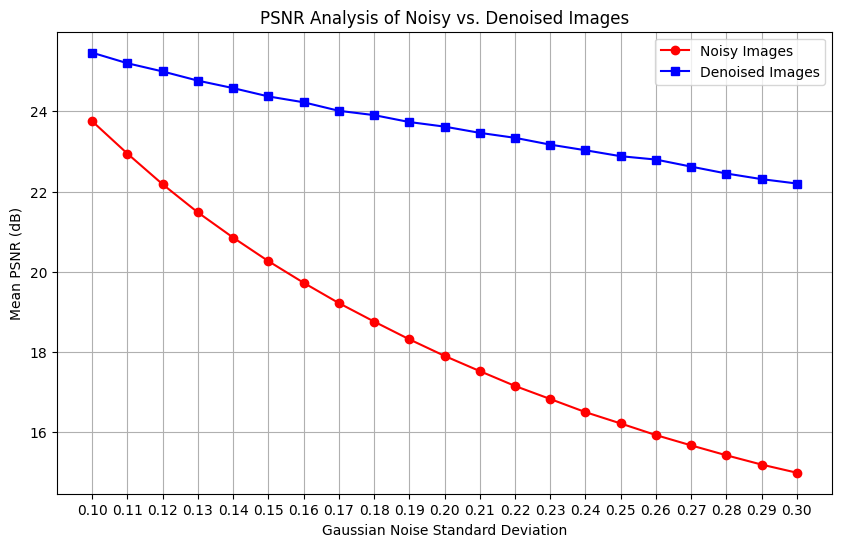

In [4]:
import matplotlib.pyplot as plt

# Extract data for plotting
noise_levels = sorted(psnr_summary.keys())  # Ensure noise levels are in ascending order
mean_psnr_noisy = [psnr_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_psnr_denoised = [psnr_summary[nl]["mean_denoised"] for nl in noise_levels]

# Plot PSNR values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_psnr_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_psnr_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Gaussian Noise Standard Deviation")
plt.ylabel("Mean PSNR (dB)")
plt.title("PSNR Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

#### Poisson

In [6]:
import os
import pydicom
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from skimage import img_as_float

# Define base paths

# Define paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (17 feb)/Data10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (17 feb)/Data10/Added Noise/CATHLAB/Poisson"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (17 feb)/Results 10/RED-CNN/Poisson"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.70, 0.91, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store PSNR results per noise level
psnr_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    psnr_results = []
    psnr_noisy_list = []
    psnr_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute PSNR
        psnr_noisy = peak_signal_noise_ratio(normal_img, noisy_img)
        psnr_denoised = peak_signal_noise_ratio(normal_img, denoised_img)

        # Store the results
        psnr_results.append((filename, psnr_noisy, psnr_denoised))
        psnr_noisy_list.append(psnr_noisy)
        psnr_denoised_list.append(psnr_denoised)

    # Compute mean and standard deviation
    if psnr_noisy_list and psnr_denoised_list:
        mean_psnr_noisy = np.mean(psnr_noisy_list)
        std_psnr_noisy = np.std(psnr_noisy_list)
        mean_psnr_denoised = np.mean(psnr_denoised_list)
        std_psnr_denoised = np.std(psnr_denoised_list)

        # Store results in dictionary
        psnr_summary[noise_level] = {
            "mean_noisy": mean_psnr_noisy,
            "std_noisy": std_psnr_noisy,
            "mean_denoised": mean_psnr_denoised,
            "std_denoised": std_psnr_denoised,
            "results": psnr_results
        }

    # Print results for the current noise level
    print("\nPSNR Results:")
    print(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}")
    print("=" * 40)
    for filename, psnr_noisy, psnr_denoised in psnr_results:
        print(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_psnr_noisy:<15.2f} {mean_psnr_denoised:<15.2f}")
    print(f"{'Std Dev':<10} {std_psnr_noisy:<15.2f} {std_psnr_denoised:<15.2f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}")
print("=" * 60)
for noise_level, values in psnr_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}")

print("\nProcessing complete.")


Processing noise level: 0.70...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   20.17           21.40          
FCAVDP0A   20.11           21.33          
FCAVDP0C   20.09           21.32          
FCAVDP0E   20.09           21.31          
FCAVDP0G   20.10           21.32          
FCAVDP0H   20.09           21.31          
FCAVDP0K   20.10           21.33          
FCAVDP0M   20.07           21.31          
FCAVDP0O   20.05           21.28          
FCAVDP0Q   20.04           21.27          
Mean       20.09           21.32          
Std Dev    0.03            0.03           

Processing noise level: 0.71...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   20.46           21.74          
FCAVDP0A   20.39           21.67          
FCAVDP0C   20.39           21.67          
FCAVDP0E   20.39           21.67          
FCAVDP0G   20.38           21.66          
FCAVDP0H   20.38           21.66          
FCAVDP0K   20.38           21.67          
F

In [ ]:
# Save results to a text file
output_file = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results.txt"
with open(output_file, "w") as f:
    f.write("Final Summary of All Noise Levels:\n")
    f.write(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}\n")
    f.write("=" * 60 + "\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}\n")
    
    f.write("\nDetailed Results for Each Noise Level:\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"\nNoise Level: {noise_level}\n")
        f.write(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}\n")
        f.write("=" * 40 + "\n")
        for filename, psnr_noisy, psnr_denoised in values["results"]:
            f.write(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}\n")
        f.write("=" * 40 + "\n")
        f.write(f"{'Mean':<10} {values['mean_noisy']:<15.2f} {values['mean_denoised']:<15.2f}\n")
        f.write(f"{'Std Dev':<10} {values['std_noisy']:<15.2f} {values['std_denoised']:<15.2f}\n")

print(f"\nResults saved to {output_file}")

In [7]:
import pandas as pd

# Prepare data for Excel
data_list = []
for noise_level, values in psnr_summary.items():
    for filename, psnr_noisy, psnr_denoised in values["results"]:
        data_list.append([noise_level, filename, psnr_noisy, psnr_denoised])

# Convert to DataFrame
df = pd.DataFrame(data_list, columns=["Noise Level", "Filename", "PSNR (Noisy)", "PSNR (Denoised)"])

# Add summary statistics
summary_df = pd.DataFrame({
    "Noise Level": list(psnr_summary.keys()),
    "Mean PSNR (Noisy)": [psnr_summary[nl]["mean_noisy"] for nl in psnr_summary.keys()],
    "Std PSNR (Noisy)": [psnr_summary[nl]["std_noisy"] for nl in psnr_summary.keys()],
    "Mean PSNR (Denoised)": [psnr_summary[nl]["mean_denoised"] for nl in psnr_summary.keys()],
    "Std PSNR (Denoised)": [psnr_summary[nl]["std_denoised"] for nl in psnr_summary.keys()]
})

# Save to Excel
output_excel = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_RED-CNN_Poisson.xlsx"
with pd.ExcelWriter(output_excel, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Detailed Results", index=False)
    summary_df.to_excel(writer, sheet_name="Summary Statistics", index=False)

print(f"\nResults saved to {output_excel}")



Results saved to C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_RED-CNN_Poisson.xlsx


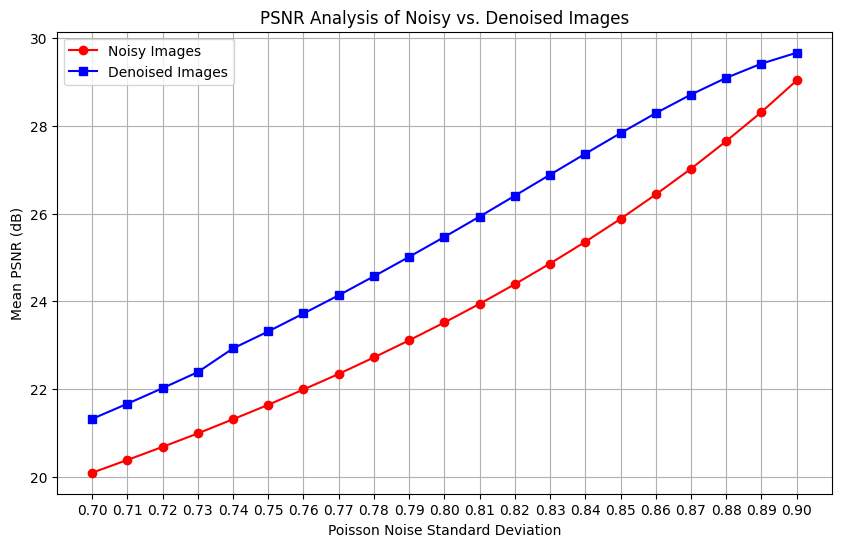

In [8]:
import matplotlib.pyplot as plt

# Extract data for plotting
noise_levels = sorted(psnr_summary.keys())  # Ensure noise levels are in ascending order
mean_psnr_noisy = [psnr_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_psnr_denoised = [psnr_summary[nl]["mean_denoised"] for nl in noise_levels]

# Plot PSNR values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_psnr_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_psnr_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Poisson Noise Standard Deviation")
plt.ylabel("Mean PSNR (dB)")
plt.title("PSNR Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

### NLMD

#### Gaussian

In [5]:
import os
import pydicom
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from skimage import img_as_float

# Define base paths

# Define paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Added Noise/CATHLAB/Gaussian"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Results 10/NLMD57/Gaussian"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.10, 0.31, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store PSNR results per noise level
psnr_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    psnr_results = []
    psnr_noisy_list = []
    psnr_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute PSNR
        psnr_noisy = peak_signal_noise_ratio(normal_img, noisy_img)
        psnr_denoised = peak_signal_noise_ratio(normal_img, denoised_img)

        # Store the results
        psnr_results.append((filename, psnr_noisy, psnr_denoised))
        psnr_noisy_list.append(psnr_noisy)
        psnr_denoised_list.append(psnr_denoised)

    # Compute mean and standard deviation
    if psnr_noisy_list and psnr_denoised_list:
        mean_psnr_noisy = np.mean(psnr_noisy_list)
        std_psnr_noisy = np.std(psnr_noisy_list)
        mean_psnr_denoised = np.mean(psnr_denoised_list)
        std_psnr_denoised = np.std(psnr_denoised_list)

        # Store results in dictionary
        psnr_summary[noise_level] = {
            "mean_noisy": mean_psnr_noisy,
            "std_noisy": std_psnr_noisy,
            "mean_denoised": mean_psnr_denoised,
            "std_denoised": std_psnr_denoised,
            "results": psnr_results
        }

    # Print results for the current noise level
    print("\nPSNR Results:")
    print(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}")
    print("=" * 40)
    for filename, psnr_noisy, psnr_denoised in psnr_results:
        print(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_psnr_noisy:<15.2f} {mean_psnr_denoised:<15.2f}")
    print(f"{'Std Dev':<10} {std_psnr_noisy:<15.2f} {std_psnr_denoised:<15.2f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}")
print("=" * 60)
for noise_level, values in psnr_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}")

print("\nProcessing complete.")


Processing noise level: 0.10...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   23.66           27.02          
FCAVDP0A   23.38           26.47          
FCAVDP0C   23.51           26.57          
FCAVDP0E   23.94           27.73          
FCAVDP0G   23.92           28.88          
FCAVDP0H   23.89           28.62          
FCAVDP0K   23.89           27.39          
FCAVDP0M   23.84           27.09          
FCAVDP0O   23.58           28.17          
FCAVDP0Q   23.90           27.40          
Mean       23.75           27.53          
Std Dev    0.19            0.77           

Processing noise level: 0.11...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   22.85           26.11          
FCAVDP0A   22.59           26.86          
FCAVDP0C   22.72           26.55          
FCAVDP0E   23.16           27.63          
FCAVDP0G   23.13           26.78          
FCAVDP0H   23.08           27.89          
FCAVDP0K   23.04           28.52          
F

In [ ]:
# Save results to a text file
output_file = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results.txt"
with open(output_file, "w") as f:
    f.write("Final Summary of All Noise Levels:\n")
    f.write(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}\n")
    f.write("=" * 60 + "\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}\n")
    
    f.write("\nDetailed Results for Each Noise Level:\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"\nNoise Level: {noise_level}\n")
        f.write(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}\n")
        f.write("=" * 40 + "\n")
        for filename, psnr_noisy, psnr_denoised in values["results"]:
            f.write(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}\n")
        f.write("=" * 40 + "\n")
        f.write(f"{'Mean':<10} {values['mean_noisy']:<15.2f} {values['mean_denoised']:<15.2f}\n")
        f.write(f"{'Std Dev':<10} {values['std_noisy']:<15.2f} {values['std_denoised']:<15.2f}\n")

print(f"\nResults saved to {output_file}")

In [6]:
import pandas as pd

# Prepare data for Excel
data_list = []
for noise_level, values in psnr_summary.items():
    for filename, psnr_noisy, psnr_denoised in values["results"]:
        data_list.append([noise_level, filename, psnr_noisy, psnr_denoised])

# Convert to DataFrame
df = pd.DataFrame(data_list, columns=["Noise Level", "Filename", "PSNR (Noisy)", "PSNR (Denoised)"])

# Add summary statistics
summary_df = pd.DataFrame({
    "Noise Level": list(psnr_summary.keys()),
    "Mean PSNR (Noisy)": [psnr_summary[nl]["mean_noisy"] for nl in psnr_summary.keys()],
    "Std PSNR (Noisy)": [psnr_summary[nl]["std_noisy"] for nl in psnr_summary.keys()],
    "Mean PSNR (Denoised)": [psnr_summary[nl]["mean_denoised"] for nl in psnr_summary.keys()],
    "Std PSNR (Denoised)": [psnr_summary[nl]["std_denoised"] for nl in psnr_summary.keys()]
})

# Save to Excel
output_excel = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_NLMD57_Gaussian.xlsx"
with pd.ExcelWriter(output_excel, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Detailed Results", index=False)
    summary_df.to_excel(writer, sheet_name="Summary Statistics", index=False)

print(f"\nResults saved to {output_excel}")



Results saved to C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_NLMD57_Gaussian.xlsx


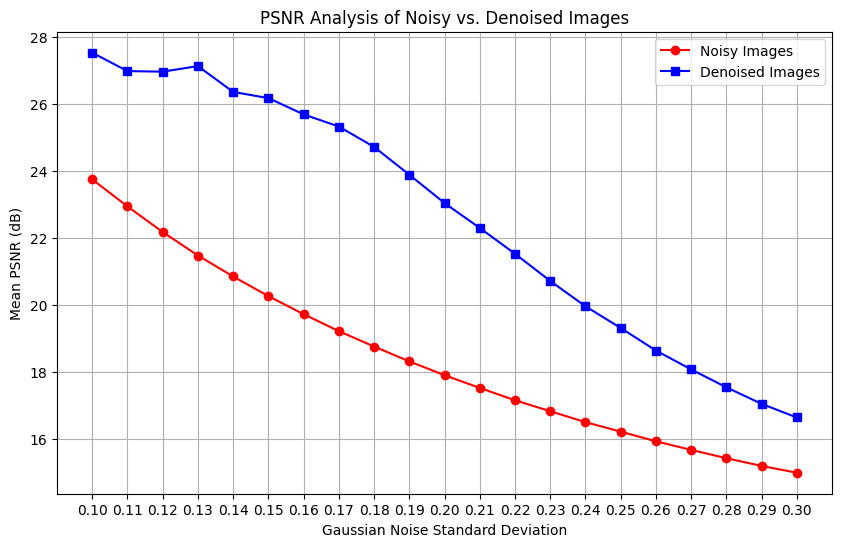

In [7]:
import matplotlib.pyplot as plt

# Extract data for plotting
noise_levels = sorted(psnr_summary.keys())  # Ensure noise levels are in ascending order
mean_psnr_noisy = [psnr_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_psnr_denoised = [psnr_summary[nl]["mean_denoised"] for nl in noise_levels]

# Plot PSNR values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_psnr_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_psnr_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Gaussian Noise Standard Deviation")
plt.ylabel("Mean PSNR (dB)")
plt.title("PSNR Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

#### Poisson

In [8]:
import os
import pydicom
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from skimage import img_as_float

# Define base paths

# Define paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Added Noise/CATHLAB/Poisson"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Results 10/NLMD57/Poisson"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.70, 0.91, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store PSNR results per noise level
psnr_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    psnr_results = []
    psnr_noisy_list = []
    psnr_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute PSNR
        psnr_noisy = peak_signal_noise_ratio(normal_img, noisy_img)
        psnr_denoised = peak_signal_noise_ratio(normal_img, denoised_img)

        # Store the results
        psnr_results.append((filename, psnr_noisy, psnr_denoised))
        psnr_noisy_list.append(psnr_noisy)
        psnr_denoised_list.append(psnr_denoised)

    # Compute mean and standard deviation
    if psnr_noisy_list and psnr_denoised_list:
        mean_psnr_noisy = np.mean(psnr_noisy_list)
        std_psnr_noisy = np.std(psnr_noisy_list)
        mean_psnr_denoised = np.mean(psnr_denoised_list)
        std_psnr_denoised = np.std(psnr_denoised_list)

        # Store results in dictionary
        psnr_summary[noise_level] = {
            "mean_noisy": mean_psnr_noisy,
            "std_noisy": std_psnr_noisy,
            "mean_denoised": mean_psnr_denoised,
            "std_denoised": std_psnr_denoised,
            "results": psnr_results
        }

    # Print results for the current noise level
    print("\nPSNR Results:")
    print(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}")
    print("=" * 40)
    for filename, psnr_noisy, psnr_denoised in psnr_results:
        print(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_psnr_noisy:<15.2f} {mean_psnr_denoised:<15.2f}")
    print(f"{'Std Dev':<10} {std_psnr_noisy:<15.2f} {std_psnr_denoised:<15.2f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}")
print("=" * 60)
for noise_level, values in psnr_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}")

print("\nProcessing complete.")


Processing noise level: 0.70...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   20.17           27.25          
FCAVDP0A   20.11           24.77          
FCAVDP0C   20.09           25.27          
FCAVDP0E   20.09           27.13          
FCAVDP0G   20.10           27.16          
FCAVDP0H   20.09           26.23          
FCAVDP0K   20.10           26.58          
FCAVDP0M   20.07           26.34          
FCAVDP0O   20.05           27.02          
FCAVDP0Q   20.04           27.27          
Mean       20.09           26.50          
Std Dev    0.03            0.83           

Processing noise level: 0.71...

PSNR Results:
Filename   PSNR (Noisy)    PSNR (Denoised)
FCAVDP00   20.46           27.07          
FCAVDP0A   20.39           28.58          
FCAVDP0C   20.39           28.77          
FCAVDP0E   20.39           29.90          
FCAVDP0G   20.38           27.47          
FCAVDP0H   20.38           27.09          
FCAVDP0K   20.38           26.53          
F

In [9]:
# Save results to a text file
output_file = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results.txt"
with open(output_file, "w") as f:
    f.write("Final Summary of All Noise Levels:\n")
    f.write(f"{'Noise Level':<10} {'Mean PSNR (Noisy)':<20} {'Mean PSNR (Denoised)':<20}\n")
    f.write("=" * 60 + "\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"{noise_level:<10} {values['mean_noisy']:<20.2f} {values['mean_denoised']:<20.2f}\n")
    
    f.write("\nDetailed Results for Each Noise Level:\n")
    for noise_level, values in psnr_summary.items():
        f.write(f"\nNoise Level: {noise_level}\n")
        f.write(f"{'Filename':<10} {'PSNR (Noisy)':<15} {'PSNR (Denoised)':<15}\n")
        f.write("=" * 40 + "\n")
        for filename, psnr_noisy, psnr_denoised in values["results"]:
            f.write(f"{filename:<10} {psnr_noisy:<15.2f} {psnr_denoised:<15.2f}\n")
        f.write("=" * 40 + "\n")
        f.write(f"{'Mean':<10} {values['mean_noisy']:<15.2f} {values['mean_denoised']:<15.2f}\n")
        f.write(f"{'Std Dev':<10} {values['std_noisy']:<15.2f} {values['std_denoised']:<15.2f}\n")

print(f"\nResults saved to {output_file}")


Results saved to C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results.txt


In [10]:
import pandas as pd

# Prepare data for Excel
data_list = []
for noise_level, values in psnr_summary.items():
    for filename, psnr_noisy, psnr_denoised in values["results"]:
        data_list.append([noise_level, filename, psnr_noisy, psnr_denoised])

# Convert to DataFrame
df = pd.DataFrame(data_list, columns=["Noise Level", "Filename", "PSNR (Noisy)", "PSNR (Denoised)"])

# Add summary statistics
summary_df = pd.DataFrame({
    "Noise Level": list(psnr_summary.keys()),
    "Mean PSNR (Noisy)": [psnr_summary[nl]["mean_noisy"] for nl in psnr_summary.keys()],
    "Std PSNR (Noisy)": [psnr_summary[nl]["std_noisy"] for nl in psnr_summary.keys()],
    "Mean PSNR (Denoised)": [psnr_summary[nl]["mean_denoised"] for nl in psnr_summary.keys()],
    "Std PSNR (Denoised)": [psnr_summary[nl]["std_denoised"] for nl in psnr_summary.keys()]
})

# Save to Excel
output_excel = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_NLMD57_Poisson.xlsx"
with pd.ExcelWriter(output_excel, engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Detailed Results", index=False)
    summary_df.to_excel(writer, sheet_name="Summary Statistics", index=False)

print(f"\nResults saved to {output_excel}")



Results saved to C:/Matthew/Kuliah/Semester 8/Pengolahan Data/PSNR_Results_NLMD57_Poisson.xlsx


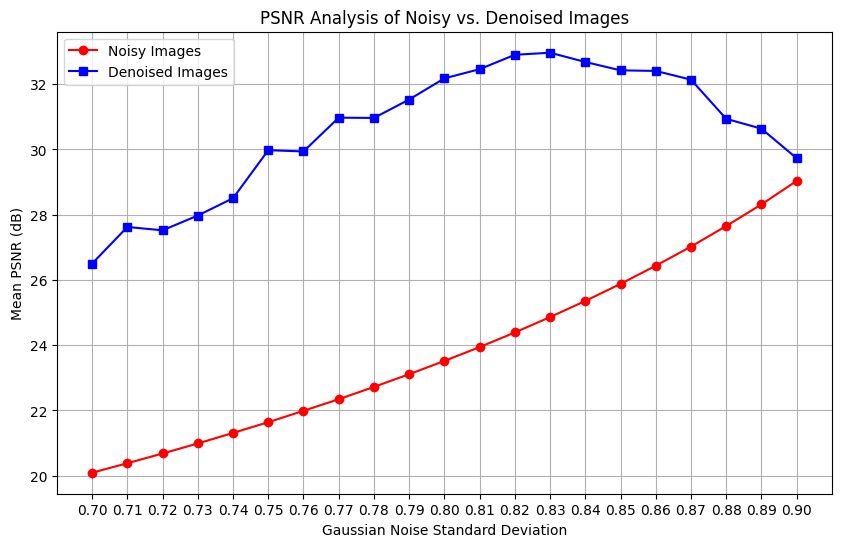

In [11]:
import matplotlib.pyplot as plt

# Extract data for plotting
noise_levels = sorted(psnr_summary.keys())  # Ensure noise levels are in ascending order
mean_psnr_noisy = [psnr_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_psnr_denoised = [psnr_summary[nl]["mean_denoised"] for nl in noise_levels]

# Plot PSNR values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_psnr_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_psnr_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Gaussian Noise Standard Deviation")
plt.ylabel("Mean PSNR (dB)")
plt.title("PSNR Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)